In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import math as mh
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
dff=pd.read_csv('atlast_data.csv',index_col=0)
cor=dff.corr()
#cor=cor.drop(columns=['time','lon','lat'])
cor.drop(columns=['time','lon','lat'],axis=0)


,no2,o3,so2,pm2.5,pm10,co,tmax,tmin,hum,opady,tysk,wind
time,-0.415741,0.387441,-0.240323,-0.368899,-0.390421,-0.605185,0.826676,0.846596,-0.440903,0.224874,-0.222992,-0.080717
lon,-0.424547,0.030846,-0.461588,-0.207922,-0.254245,-0.258727,-0.042636,-0.032703,0.175312,0.085854,0.094838,-0.096535
lat,-0.188201,0.042263,-0.147747,-0.097050,-0.086878,-0.051185,-0.007945,0.002081,0.045270,-0.023346,0.340029,-0.002991
no2,1.000000,-0.521072,0.726618,0.624651,0.651734,0.751877,-0.277203,-0.243154,0.308719,-0.064895,-0.005493,0.074401
o3,-0.521072,1.000000,-0.059292,-0.308254,-0.297094,-0.510993,0.349467,0.175435,-0.673717,-0.169933,-0.075370,0.313442
so2,0.726618,-0.059292,1.000000,0.687509,0.715760,0.611125,-0.049439,-0.159459,-0.013148,-0.183186,-0.060192,0.199419
pm2.5,0.624651,-0.308254,0.687509,1.000000,0.989233,0.782036,-0.012987,-0.153268,0.282630,-0.116184,0.132733,-0.069917
pm10,0.651734,-0.297094,0.715760,0.989233,1.000000,0.777753,-0.032763,-0.179913,0.249959,-0.150461,0.143303,-0.046335
co,0.751877,-0.510993,0.611125,0.782036,0.777753,1.000000,-0.392282,-0.413195,0.439669,-0.085150,0.060516,-0.030763
tmax,-0.277203,0.349467,-0.049439,-0.012987,-0.032763,-0.392282,1.000000,0.876554,-0.353050,0.132974,-0.118298,-0.105003


In [2]:
chem=dff['co']
features=dff.drop(columns=['no2','o3','so2','pm10','co','pm2.5','wind','tysk','opady'],axis=1)
X_train,X_test,Y_train,Y_test = train_test_split (features,chem,test_size=0.15,random_state=10)
regr=LinearRegression()
regr.fit(X_train,Y_train)
print("r-squered for train",regr.score(X_train,Y_train))
print("r-squered for test",regr.score(X_test,Y_test))
x_incl_const=sm.add_constant(X_train)
model = sm.OLS(Y_train,x_incl_const)
results=model.fit()
dd=pd.DataFrame({'coef': results.params,'p-value':results.pvalues})
print(dd)

r-squered for train 0.5325654441667887
r-squered for test 0.5607874641648717
             coef        p-value
const  439.978169   4.603955e-18
time    -0.644798   2.335749e-60
lon     -5.598352  5.135113e-108
lat     -4.540383   3.438988e-06
tmax     2.306730   5.145293e-49
tmin    -1.960865   4.477000e-15
hum      1.617047   6.283198e-77


C:\Users\Yura Dudyuk\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [3]:
variance_inflation_factor(exog=x_incl_const.values,exog_idx=1)
vif=[variance_inflation_factor(exog=x_incl_const.values,exog_idx=i) for i in range(x_incl_const.shape[1])]
dd=pd.DataFrame({'coef_name': x_incl_const.columns,'vif':vif})
dd

,coef_name,vif
0,const,16112.269272
1,time,6.637450
2,lon,1.103104
3,lat,1.004306
4,tmax,6.152524
5,tmin,10.168143
6,hum,2.385600


In [4]:
x_incl_const=sm.add_constant(X_train)
model = sm.OLS(Y_train,x_incl_const)
results=model.fit()
org_coef=pd.DataFrame({'coef': results.params,'p-value':results.pvalues})
print('BIC',results.bic)
print('r-squared',results.rsquared)

BIC 25200.79763439282
r-squared 0.5325654441667889


C:\Users\Yura Dudyuk\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [5]:
x_incl_const=sm.add_constant(X_train)
x_incl_const=x_incl_const.drop(['tmin'],axis=1)
model = sm.OLS(Y_train,x_incl_const)
results=model.fit()
reduced_coef=pd.DataFrame({'coef': results.params,'p-value':results.pvalues})
print('BIC',results.bic)
print('r-squared',results.rsquared)


BIC 25254.49720801494
r-squared 0.5222167652829612


C:\Users\Yura Dudyuk\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [6]:
frames=[org_coef,reduced_coef]
news=pd.concat(frames,axis=1)
news

,coef,p-value,coef,p-value
const,439.978169,4.603955e-18,466.763904,8.547091e-20
time,-0.644798,2.335749e-60,-0.850871,6.562131e-171
lon,-5.598352,5.135113e-108,-5.176171,3.617216e-96
lat,-4.540383,3.438988e-06,-4.275334,1.501315e-05
tmax,2.306730,5.145293e-49,1.472091,6.617346e-38
tmin,-1.960865,4.477000e-15,NaN,NaN
hum,1.617047,6.283198e-77,1.169639,3.153650e-72


In [7]:
y_test_pred=regr.predict(X_test)
y_test_pred


array([189.72279571, 158.86869165, 194.27190021, 225.99404436,
       168.94557873, 183.50464519, 159.14513337, 173.85663107,
       181.38893739, 166.09855747, 184.40668837, 161.8426251 ,
       145.40944001, 214.46533631, 188.42457918, 153.37176006,
       149.55120192, 204.06583264, 177.96912615, 191.43724177,
       191.29726592, 169.66440807, 202.12951639, 231.55495616,
       206.82688454, 173.9389369 , 165.24043643, 185.98321162,
       196.19714446, 176.10839144, 209.99283048, 162.96134519,
       178.10186101, 192.7483398 , 168.94914693, 197.23356641,
       190.61327844, 181.97998487, 178.65416627, 171.48914784,
       169.36706508, 212.15579004, 212.18327141, 179.03643334,
       191.86822423, 218.28137545, 200.1767113 , 153.8796799 ,
       142.3624596 , 216.53172365, 190.26129481, 199.49643821,
       140.72329585, 188.40974842, 190.09873452, 210.92772348,
       153.9636571 , 202.09603442, 157.84967912, 208.57140988,
       150.7760749 , 196.60921279, 196.58127237, 201.16

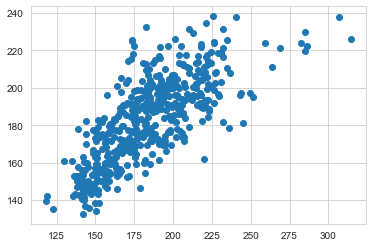

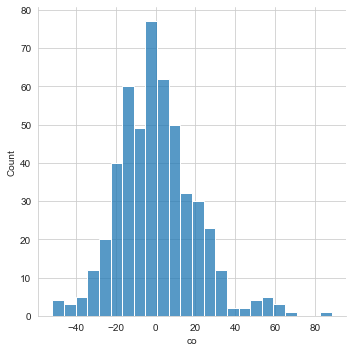

In [9]:
sns.displot(Y_test-y_test_pred)
y_for_gaus=Y_test-y_test_pred

In [10]:
import scipy
scipy.stats.shapiro(y_for_gaus)

ShapiroResult(statistic=0.9743122458457947, pvalue=1.1733489913012818e-07)

In [11]:
print('MAE',metrics.mean_absolute_error(Y_test,y_test_pred))
print('MSE',metrics.mean_squared_error(Y_test,y_test_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_test,y_test_pred)))

MAE 14.822224590391857
MSE 387.9380153636237
RMSE 19.69614214417696


r-squered for train 0.8464115564436074
r-squered for test 0.8356153358533669
MAE 8.861728602616232
MSE 145.1940806835237
RMSE 12.049650645704368


ShapiroResult(statistic=0.9576957821846008, pvalue=9.548784679624944e-11)

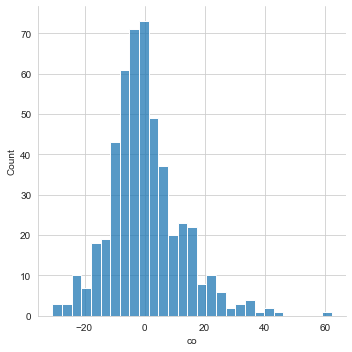

In [12]:
model=RandomForestRegressor(n_estimators=60,min_samples_leaf=5,max_depth=6,n_jobs=1)
model.fit(X_train,Y_train)
print("r-squered for train",model.score(X_train,Y_train))
print("r-squered for test",model.score(X_test,Y_test))
y_test_pred=model.predict(X_test)

sns.displot(Y_test-y_test_pred)
y_for_gaus=Y_test-y_test_pred
scipy.stats.shapiro(y_for_gaus)
print('MAE',metrics.mean_absolute_error(Y_test,y_test_pred))
print('MSE',metrics.mean_squared_error(Y_test,y_test_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_test,y_test_pred)))
scipy.stats.shapiro(y_for_gaus)